# **Dilation, Erosion and Edge Detection**

**In this lesson we'll learn:**
1. Dilation
2. Erosion
3. Opening
4. Closing
5. Canny Edge Detection

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

def imshow(image, title="", size=10):
    w, h= image.shape[:2]
    aspect_ratio= w/h
    plt.figure(figsize=(size*aspect_ratio, size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)

- **Dilation** – Adds pixels to the boundaries of objects in an image
- **Erosion** – Removes pixels at the boundaries of objects in an image
- **Opening** - Erosion followed by dilation
- **Closing** - Dilation followed by erosion 

![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/Screenshot%202021-11-15%20at%205.19.08%20pm.png)

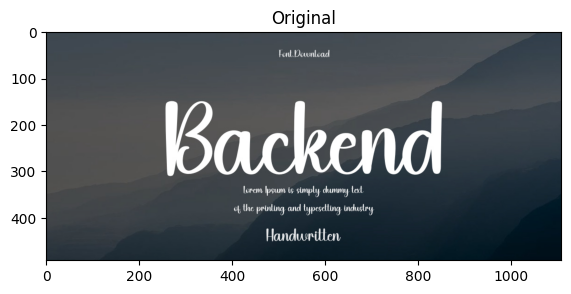

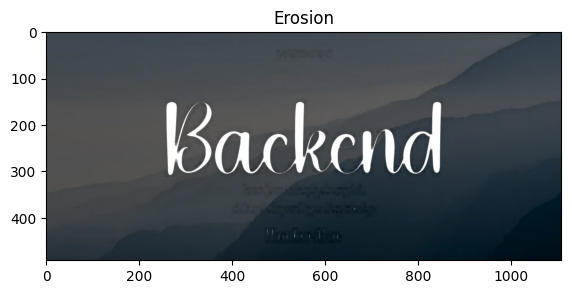

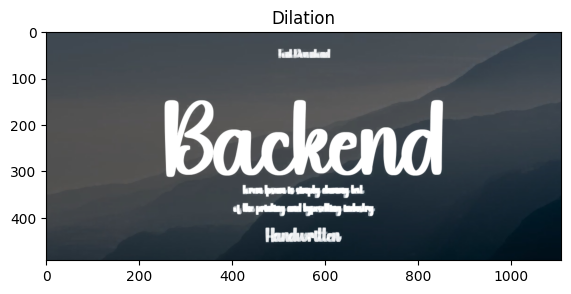

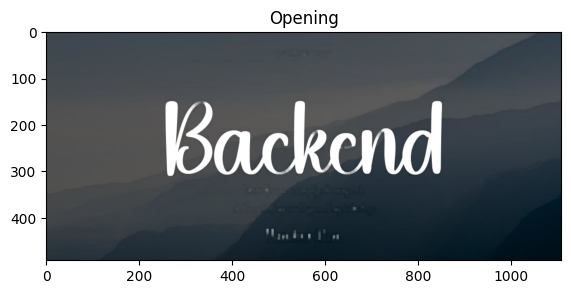

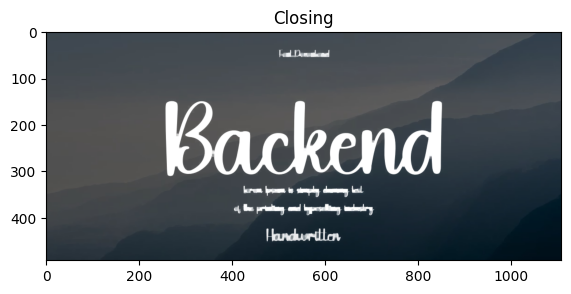

In [75]:
# image= np.zeros((350,700), np.uint8)
# string='OpenCV'
# cv2.putText(image, string, (50,200), cv2.FONT_HERSHEY_SIMPLEX, 5, 255, 15)
image= cv2.imread('images/written.jpg')
imshow(image, 'Original', 15)

# Let's define our kernel size
kernel= np.ones((5,5), np.uint8)

# Erode
erosion= cv2.erode(image, kernel, iterations=1)
imshow(erosion, 'Erosion', 15)

# Dilation
dilation= cv2.dilate(image, kernel, iterations=1)
imshow(dilation, 'Dilation', 15)

# Opening - Good for removing noise
opening= cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel, iterations=1)
imshow(opening, 'Opening', 15)

# Closing - Good for removing noise
closing= cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel, iterations=1)
imshow(closing, 'Closing', 15)

## **Canny Edge Detection** 
![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/Screenshot%202021-11-15%20at%205.24.15%20pm.png)

- The first argument is our input image.
- The second and third arguments are our minVal and maxVal respectively. 
- The forth argument is aperture_size. It is the size of Sobel kernel used for find image gradients. By default it is 3. 

Edge detection needs a threshold to tell what difference/change should be counted as edge

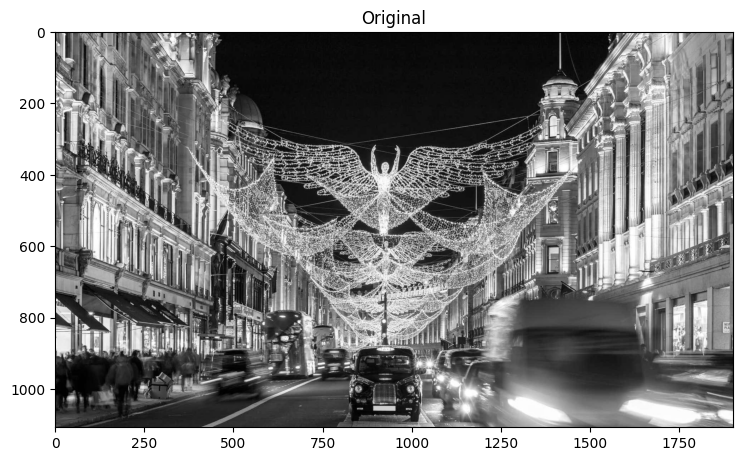

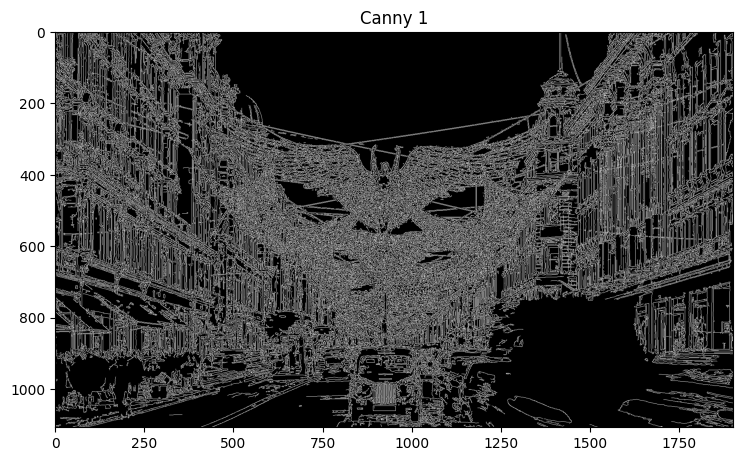

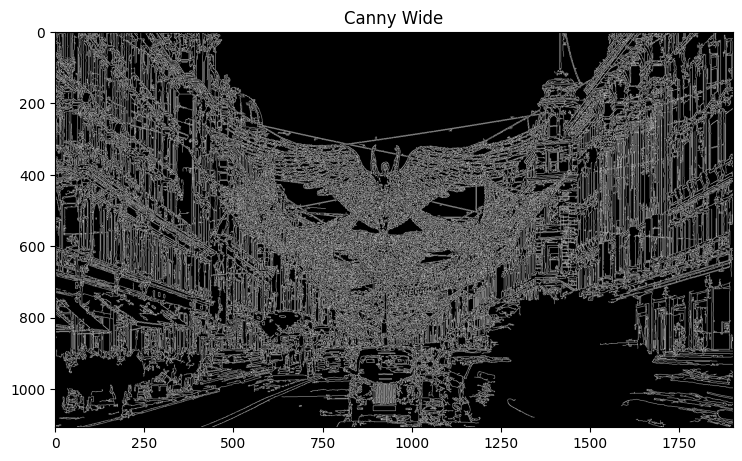

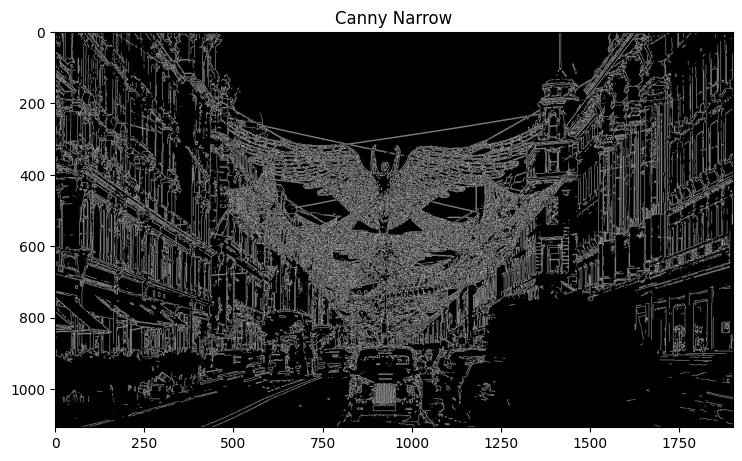

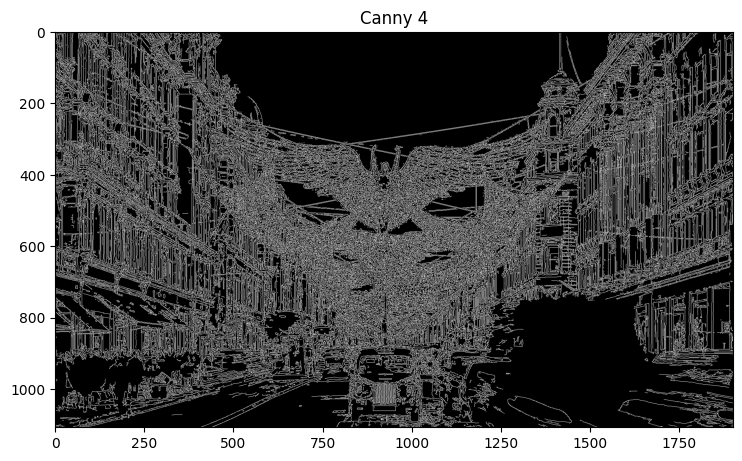

In [96]:
image= cv2.imread('images/london_xmas.jpg', 0)
imshow(image, 'Original', 15)

# Canny Edge Detection uses gradient values as thresholds
# The first threshold gradient
canny= cv2.Canny(image, 50, 120)
imshow(canny, 'Canny 1', 15)

# Wide edge thresholds expect lots of edges
canny= cv2.Canny(image, 10, 200)
imshow(canny, 'Canny Wide', 15)

# Narrow threshold, expect less edges 
canny= cv2.Canny(image, 200, 240)
imshow(canny, 'Canny Narrow', 15)

canny = cv2.Canny(image, 60, 110)
imshow(canny, 'Canny 4', 15)

##  Then, we need to provide two values: threshold1 and threshold2. Any gradient value larger than threshold2
# is considered to be an edge. Any value below threshold1 is considered not to be an edge. 
#Values in between threshold1 and threshold2 are either classiﬁed as edges or non-edges based on how their 
#intensities are “connected”. In this case, any gradient values below 60 are considered non-edges
#whereas any values above 120 are considered edges.

### **Auto Canny**


med_val: 99.0
edges shape: (1108, 1900)


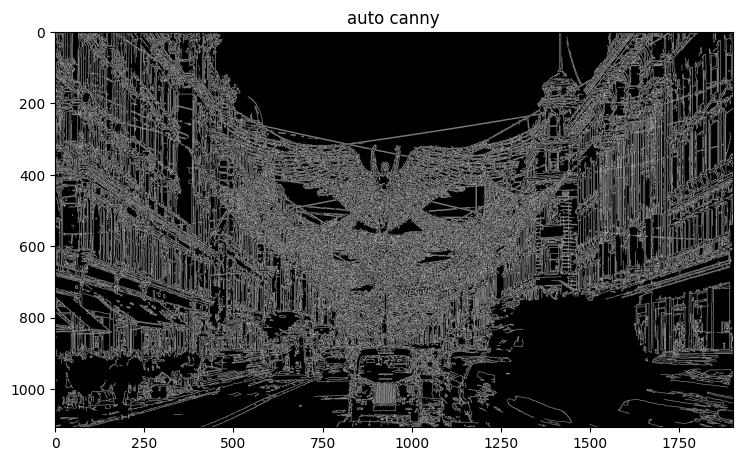

In [99]:
def autoCanny(image):
    # Finds optimal thresholds based on median image pixel intensity
    blurred_img = cv2.blur(image, ksize=(5,5))
    med_val = np.median(image) 
    print(f'med_val: {med_val}')
    lower = int(max(0, 0.66 * med_val))
    upper = int(min(255, 1.33 * med_val))
    edges = cv2.Canny(image=image, threshold1=lower, threshold2=upper)
    print(f'edges shape: {edges.shape}')
    return edges

auto_canny = autoCanny(image)
imshow( auto_canny, 'auto canny', 15)